In [18]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from lightgbm import LGBMClassifier
from collections import Counter
from warnings import filterwarnings
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import random
%matplotlib notebook
# filterwarnings("ignore",category=DeprecationWarning)

import json

In [19]:
X_train, y_train, X_train_skel_features = None, None, None
with open("./data/train_info", "rb") as fin:
    data = pickle.load(fin)
    X_train, y_train, X_train_skel_features = data["data"], data["labels"], data["skel_features"]

# X_test, y_test, X_test_skel_features = None, None, None
# with open("./data/test_info", "rb") as fin:
#     data = pickle.load(fin)
#     X_test, y_test, X_test_skel_features = data["data"], data["labels"], data["skel_features"]

In [21]:
def get_edges_ged_rad(skel_features):
    edges_x = []
    edges_y = []
    degs = set()
    rads = set()
    for i, d in enumerate(skel_features):
        if i % 4 == 0:
            edges_x.append(d)
        if i % 4 == 1:
            edges_y.append(d)
        if i % 4 == 2:
            degs.add((edges_x[-1], edges_y[-1], d))
        if i % 4 == 3:
            rads.add((edges_x[-1], edges_y[-1], d))
    
    return edges_x, edges_y, list(degs), list(rads)

In [4]:
def draw_skeleton(image, features):
    res_x, res_y, res_deg, res_rad = get_edges_ged_rad(features)
    
    fig = plt.figure(figsize=(18, 8))

    ax = fig.add_subplot(121)
    ax.set_xlim(0, 28)
    ax.set_ylim(0, 28)
#     ax.imshow(image.reshape((s, s)), cmap="gray", interpolation="none")

    for i in range(0, len(res_x), 2):
        ax.plot(res_x[i:i + 2], np.array(res_y[i:i + 2]), color="black")

    for i in range(len(res_deg)):
        x, y, d = res_deg[i]
        ax.scatter([x], [y], color="blue", s=5)
        ax.text(x, y, str(int(d)), fontsize=12, color="red")

    for i in range(len(res_rad)):
        x, y, r = res_deg[i]
        circle = plt.Circle((x, y), r, color="cyan", ls="-", linewidth=2, fill=False)
        ax.add_patch(circle)
        
    ax = fig.add_subplot(122)

    ax.imshow(image.reshape((s, s)), cmap="gray", interpolation="none")

    for i in range(0, len(res_x), 2):
        ax.plot(res_x[i:i + 2], s - np.array(res_y[i:i + 2]), color="black")

    for i in range(len(res_deg)):
        x, y, d = res_deg[i]
        ax.scatter([x], [s - y], color="blue", s=5)
        ax.text(x, s - y, str(int(d)), fontsize=12, color="red")

    for i in range(len(res_rad)):
        x, y, r = res_deg[i]
#         circle = plt.Circle((x, s - y), r, color="cyan", ls="-", linewidth=2, fill=False)
        ax.scatter([x], [s - y], color="blue", s=5)
#         ax.add_patch(circle)
        
#     plt.savefig('fig.png')
    fig.show()

In [6]:
s = int(np.sqrt(X_train.shape[1]))

In [7]:
def draw_without_img_skeleton(features):
    res_x, res_y, res_deg, res_rad = get_edges_ged_rad(features)
    
    fig = plt.figure(figsize=(7, 8))

    ax = fig.add_subplot(111)
    ax.set_xlim(0, 28)
    ax.set_ylim(0, 28)

    for i in range(0, len(res_x), 2):
        ax.plot(res_x[i:i + 2], np.array(res_y[i:i + 2]), color="black")

    for i in range(len(res_deg)):
        x, y, d = res_deg[i]
        ax.scatter([x], [y], color="blue", s=5)
        ax.text(x, y, str(int(d)), fontsize=12, color="red")

    for i in range(len(res_rad)):
        x, y, r = res_deg[i]
        circle = plt.Circle((x, y), r, color="cyan", ls="-", linewidth=2, fill=False)
        ax.scatter([x], [y], color="blue", s=5)
        ax.add_patch(circle)
        
    return fig#.show()

In [22]:
confusion = np.zeros((10, 10))

In [23]:
confusion

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

<IPython.core.display.Javascript object>


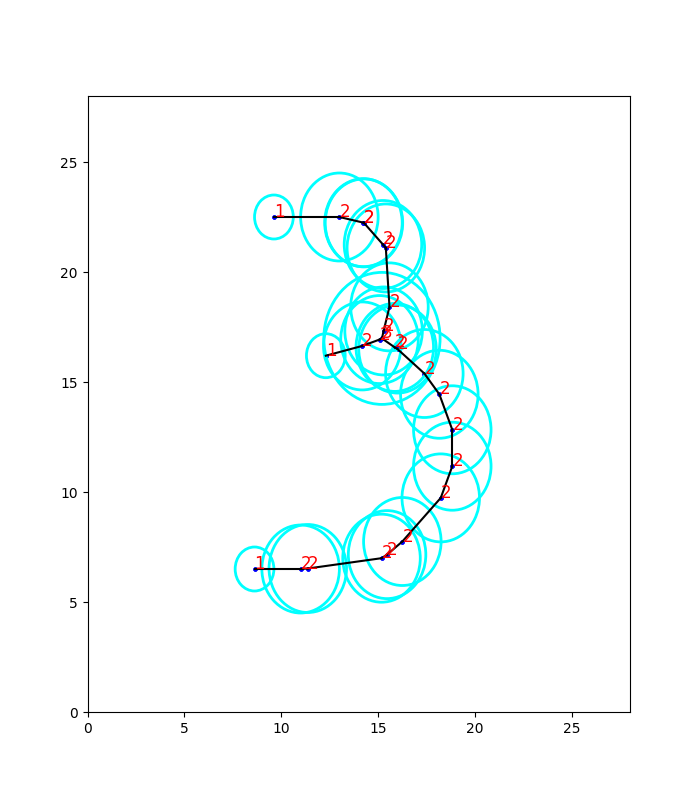

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


KeyboardInterrupt: 

In [24]:
import matplotlib
# matplotlib.use('TkAgg')

import numpy as np
import cv2
import matplotlib.pyplot as plt

for i in range(100):
    l = random.randint(0, 9)
    indx = np.random.choice(np.where(y_train == l)[0])
    features = X_train_skel_features[indx]
    res_x, res_y, res_deg, res_rad = get_edges_ged_rad(features)
    
    fig = plt.figure(figsize=(7, 8))

    ax = fig.add_subplot(111)
    ax.set_xlim(0, 28)
    ax.set_ylim(0, 28)

    for i in range(0, len(res_x), 2):
        ax.plot(res_x[i:i + 2], np.array(res_y[i:i + 2]), color="black")

    for i in range(len(res_deg)):
        x, y, d = res_deg[i]
        ax.scatter([x], [y], color="blue", s=5)
        ax.text(x, y, str(int(d)), fontsize=12, color="red")

    for i in range(len(res_rad)):
        x, y, r = res_deg[i]
        circle = plt.Circle((x, y), r, color="cyan", ls="-", linewidth=2, fill=False)
        ax.scatter([x], [y], color="blue", s=5)
        ax.add_patch(circle)
        
    # redraw the canvas
    fig.canvas.draw()

    # convert canvas to image
    img = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8,
            sep='')
    img  = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    # img is rgb, convert to opencv's default bgr
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)


    # display image with opencv or any operation you like
    cv2.imshow("plot",img)
    
    while True:
        if cv2.waitKey(1) & 0xFF == ord('z'):
            cv2.destroyAllWindows()
        time.sleep(10)
        break
            
    i = int(input())
    confusion[y_train[indx]][i] += 1

In [25]:
plt.close(fig)

In [ ]:
fig.clear

In [14]:
fig

NameError: name 'fig' is not defined

In [54]:
mapp = np.unique(res_deg[:, 0:2], axis=0)

In [9]:
def get_radius(mapp, res_rad):
    rad = np.zeros(mapp.shape[0])
    for i in res_rad:
        coord = np.where(np.all(mapp == i[:2], axis=1))[0][0]
        rad[coord] = i[-1]
    return rad

In [10]:
def get_edge(mapp, res_x, res_y):
    edges_from_to = np.hstack((res_x.reshape((-1, 1)), res_y.reshape((-1, 1))))
    edge = []
    for i in range(0, len(edges_from_to), 2):
        coord_from = np.where(np.all(mapp == edges_from_to[i], axis=1))[0][0]
        coord_to = np.where(np.all(mapp == edges_from_to[i + 1], axis=1))[0][0]
        edge.append([coord_from, coord_to])
    return edge

In [11]:
def get_deg(mapp, edge):
    deg = np.zeros(mapp.shape[0])
    for i in edge:
        deg[i[0]] += 1
        deg[i[1]] += 1
    return deg

In [14]:
def get_graphs(skel_features):
    grahps = []
    for indx, elem in enumerate(skel_features):
        res_x, res_y, res_deg, res_rad = (np.array(i) for i in get_edges_ged_rad(elem))
        if not ((int(res_deg.sum(axis = 0)[2]) == res_x.shape[0] == res_y.shape[0]) and (res_deg.shape == res_rad.shape)):
            print('error: incorrent shapes in', indx)
            continue

        mapp = np.unique(res_deg[:, 0:2], axis=0)

        rad = get_radius(mapp, res_rad)
        if len(np.where(get_radius(mapp, res_rad) == 0)[0]) != 0:
            print('error: coord in rad and deg are contradict in', indx)
            continue
        edge = get_edge(mapp, res_x, res_y)
        deg = get_deg(mapp, edge)
        nodes = np.hstack((mapp, deg.reshape((-1, 1)), rad.reshape((-1, 1)))).tolist()
        grahps.append([edge] + [nodes] + [y_test[indx]])
    return grahps

In [15]:
grahps = get_graphs(X_test_skel_features)

error: incorrent shapes in 1
error: incorrent shapes in 20
error: incorrent shapes in 36
error: incorrent shapes in 43
error: incorrent shapes in 46
error: coord in rad and deg are contradict in 50
error: incorrent shapes in 61
error: incorrent shapes in 73
error: incorrent shapes in 77
error: incorrent shapes in 97
error: incorrent shapes in 116
error: incorrent shapes in 117
error: incorrent shapes in 128
error: incorrent shapes in 132
error: coord in rad and deg are contradict in 151
error: incorrent shapes in 155
error: incorrent shapes in 162
error: incorrent shapes in 174
error: incorrent shapes in 191
error: coord in rad and deg are contradict in 192
error: incorrent shapes in 195
error: incorrent shapes in 201
error: coord in rad and deg are contradict in 202
error: incorrent shapes in 203
error: incorrent shapes in 205
error: coord in rad and deg are contradict in 211
error: coord in rad and deg are contradict in 214
error: incorrent shapes in 219
error: coord in rad and deg a

error: coord in rad and deg are contradict in 1857
error: coord in rad and deg are contradict in 1858
error: coord in rad and deg are contradict in 1859
error: coord in rad and deg are contradict in 1860
error: coord in rad and deg are contradict in 1861
error: coord in rad and deg are contradict in 1862
error: coord in rad and deg are contradict in 1864
error: incorrent shapes in 1866
error: coord in rad and deg are contradict in 1873
error: coord in rad and deg are contradict in 1874
error: coord in rad and deg are contradict in 1876
error: coord in rad and deg are contradict in 1878
error: coord in rad and deg are contradict in 1884
error: coord in rad and deg are contradict in 1888
error: coord in rad and deg are contradict in 1890
error: coord in rad and deg are contradict in 1892
error: coord in rad and deg are contradict in 1893
error: coord in rad and deg are contradict in 1894
error: coord in rad and deg are contradict in 1903
error: coord in rad and deg are contradict in 1907

error: coord in rad and deg are contradict in 2525
error: incorrent shapes in 2526
error: coord in rad and deg are contradict in 2527
error: incorrent shapes in 2530
error: coord in rad and deg are contradict in 2532
error: coord in rad and deg are contradict in 2534
error: coord in rad and deg are contradict in 2535
error: coord in rad and deg are contradict in 2536
error: incorrent shapes in 2538
error: incorrent shapes in 2539
error: incorrent shapes in 2542
error: coord in rad and deg are contradict in 2543
error: coord in rad and deg are contradict in 2548
error: incorrent shapes in 2549
error: coord in rad and deg are contradict in 2550
error: coord in rad and deg are contradict in 2552
error: coord in rad and deg are contradict in 2555
error: coord in rad and deg are contradict in 2560
error: coord in rad and deg are contradict in 2565
error: coord in rad and deg are contradict in 2567
error: incorrent shapes in 2568
error: incorrent shapes in 2582
error: coord in rad and deg ar

error: coord in rad and deg are contradict in 3042
error: coord in rad and deg are contradict in 3045
error: coord in rad and deg are contradict in 3048
error: coord in rad and deg are contradict in 3049
error: coord in rad and deg are contradict in 3051
error: incorrent shapes in 3053
error: coord in rad and deg are contradict in 3054
error: coord in rad and deg are contradict in 3056
error: coord in rad and deg are contradict in 3057
error: incorrent shapes in 3059
error: coord in rad and deg are contradict in 3064
error: coord in rad and deg are contradict in 3068
error: coord in rad and deg are contradict in 3073
error: coord in rad and deg are contradict in 3075
error: incorrent shapes in 3079
error: coord in rad and deg are contradict in 3086
error: coord in rad and deg are contradict in 3087
error: coord in rad and deg are contradict in 3088
error: coord in rad and deg are contradict in 3089
error: incorrent shapes in 3091
error: incorrent shapes in 3093
error: incorrent shapes 

error: incorrent shapes in 3852
error: incorrent shapes in 3854
error: incorrent shapes in 3856
error: coord in rad and deg are contradict in 3857
error: incorrent shapes in 3860
error: coord in rad and deg are contradict in 3864
error: coord in rad and deg are contradict in 3868
error: coord in rad and deg are contradict in 3874
error: incorrent shapes in 3879
error: coord in rad and deg are contradict in 3885
error: incorrent shapes in 3888
error: incorrent shapes in 3893
error: coord in rad and deg are contradict in 3894
error: incorrent shapes in 3895
error: incorrent shapes in 3896
error: incorrent shapes in 3899
error: incorrent shapes in 3900
error: coord in rad and deg are contradict in 3904
error: coord in rad and deg are contradict in 3905
error: coord in rad and deg are contradict in 3907
error: coord in rad and deg are contradict in 3910
error: incorrent shapes in 3912
error: incorrent shapes in 3913
error: incorrent shapes in 3914
error: coord in rad and deg are contradict

error: incorrent shapes in 4611
error: incorrent shapes in 4612
error: incorrent shapes in 4613
error: incorrent shapes in 4614
error: incorrent shapes in 4619
error: coord in rad and deg are contradict in 4620
error: incorrent shapes in 4622
error: incorrent shapes in 4623
error: incorrent shapes in 4635
error: coord in rad and deg are contradict in 4636
error: coord in rad and deg are contradict in 4642
error: incorrent shapes in 4643
error: incorrent shapes in 4646
error: incorrent shapes in 4649
error: coord in rad and deg are contradict in 4650
error: incorrent shapes in 4652
error: incorrent shapes in 4653
error: incorrent shapes in 4655
error: coord in rad and deg are contradict in 4658
error: incorrent shapes in 4659
error: coord in rad and deg are contradict in 4663
error: coord in rad and deg are contradict in 4667
error: incorrent shapes in 4673
error: coord in rad and deg are contradict in 4675
error: incorrent shapes in 4680
error: coord in rad and deg are contradict in 46

error: coord in rad and deg are contradict in 5434
error: coord in rad and deg are contradict in 5435
error: coord in rad and deg are contradict in 5436
error: incorrent shapes in 5438
error: coord in rad and deg are contradict in 5439
error: incorrent shapes in 5440
error: incorrent shapes in 5444
error: incorrent shapes in 5448
error: coord in rad and deg are contradict in 5449
error: incorrent shapes in 5462
error: coord in rad and deg are contradict in 5473
error: coord in rad and deg are contradict in 5475
error: incorrent shapes in 5477
error: incorrent shapes in 5489
error: coord in rad and deg are contradict in 5495
error: incorrent shapes in 5498
error: incorrent shapes in 5503
error: coord in rad and deg are contradict in 5507
error: incorrent shapes in 5510
error: incorrent shapes in 5511
error: incorrent shapes in 5512
error: coord in rad and deg are contradict in 5516
error: coord in rad and deg are contradict in 5524
error: incorrent shapes in 5527
error: coord in rad and

error: incorrent shapes in 6417
error: coord in rad and deg are contradict in 6421
error: incorrent shapes in 6422
error: coord in rad and deg are contradict in 6425
error: coord in rad and deg are contradict in 6427
error: coord in rad and deg are contradict in 6434
error: incorrent shapes in 6451
error: coord in rad and deg are contradict in 6461
error: coord in rad and deg are contradict in 6464
error: coord in rad and deg are contradict in 6468
error: coord in rad and deg are contradict in 6476
error: incorrent shapes in 6481
error: incorrent shapes in 6491
error: coord in rad and deg are contradict in 6498
error: incorrent shapes in 6501
error: incorrent shapes in 6503
error: incorrent shapes in 6505
error: coord in rad and deg are contradict in 6516
error: coord in rad and deg are contradict in 6519
error: incorrent shapes in 6523
error: coord in rad and deg are contradict in 6525
error: incorrent shapes in 6530
error: coord in rad and deg are contradict in 6532
error: incorrent 

error: coord in rad and deg are contradict in 7358
error: incorrent shapes in 7360
error: incorrent shapes in 7364
error: incorrent shapes in 7366
error: coord in rad and deg are contradict in 7368
error: incorrent shapes in 7377
error: incorrent shapes in 7383
error: coord in rad and deg are contradict in 7384
error: coord in rad and deg are contradict in 7385
error: coord in rad and deg are contradict in 7393
error: coord in rad and deg are contradict in 7400
error: coord in rad and deg are contradict in 7401
error: coord in rad and deg are contradict in 7405
error: incorrent shapes in 7412
error: incorrent shapes in 7416
error: coord in rad and deg are contradict in 7421
error: incorrent shapes in 7422
error: incorrent shapes in 7424
error: coord in rad and deg are contradict in 7428
error: incorrent shapes in 7432
error: incorrent shapes in 7433
error: incorrent shapes in 7443
error: incorrent shapes in 7448
error: incorrent shapes in 7450
error: incorrent shapes in 7457
error: coo

error: incorrent shapes in 8086
error: incorrent shapes in 8088
error: incorrent shapes in 8089
error: incorrent shapes in 8090
error: incorrent shapes in 8091
error: incorrent shapes in 8093
error: incorrent shapes in 8094
error: incorrent shapes in 8095
error: incorrent shapes in 8096
error: incorrent shapes in 8098
error: incorrent shapes in 8099
error: coord in rad and deg are contradict in 8100
error: coord in rad and deg are contradict in 8103
error: incorrent shapes in 8105
error: incorrent shapes in 8106
error: incorrent shapes in 8107
error: incorrent shapes in 8108
error: incorrent shapes in 8109
error: coord in rad and deg are contradict in 8110
error: coord in rad and deg are contradict in 8111
error: coord in rad and deg are contradict in 8115
error: incorrent shapes in 8116
error: coord in rad and deg are contradict in 8117
error: coord in rad and deg are contradict in 8119
error: incorrent shapes in 8120
error: incorrent shapes in 8121
error: coord in rad and deg are con

error: coord in rad and deg are contradict in 8704
error: coord in rad and deg are contradict in 8705
error: coord in rad and deg are contradict in 8707
error: incorrent shapes in 8709
error: incorrent shapes in 8710
error: incorrent shapes in 8712
error: incorrent shapes in 8713
error: incorrent shapes in 8714
error: incorrent shapes in 8715
error: coord in rad and deg are contradict in 8716
error: incorrent shapes in 8717
error: incorrent shapes in 8718
error: incorrent shapes in 8720
error: incorrent shapes in 8721
error: incorrent shapes in 8725
error: incorrent shapes in 8726
error: incorrent shapes in 8727
error: incorrent shapes in 8728
error: incorrent shapes in 8731
error: incorrent shapes in 8733
error: incorrent shapes in 8734
error: incorrent shapes in 8740
error: coord in rad and deg are contradict in 8741
error: incorrent shapes in 8742
error: coord in rad and deg are contradict in 8743
error: coord in rad and deg are contradict in 8744
error: coord in rad and deg are con

error: coord in rad and deg are contradict in 9258
error: incorrent shapes in 9259
error: coord in rad and deg are contradict in 9273
error: incorrent shapes in 9282
error: coord in rad and deg are contradict in 9292
error: coord in rad and deg are contradict in 9293
error: incorrent shapes in 9303
error: incorrent shapes in 9305
error: coord in rad and deg are contradict in 9307
error: incorrent shapes in 9308
error: coord in rad and deg are contradict in 9309
error: coord in rad and deg are contradict in 9310
error: incorrent shapes in 9312
error: incorrent shapes in 9314
error: incorrent shapes in 9317
error: incorrent shapes in 9320
error: incorrent shapes in 9324
error: coord in rad and deg are contradict in 9329
error: incorrent shapes in 9332
error: incorrent shapes in 9334
error: incorrent shapes in 9336
error: incorrent shapes in 9342
error: incorrent shapes in 9343
error: incorrent shapes in 9344
error: coord in rad and deg are contradict in 9346
error: incorrent shapes in 93

In [16]:
with open('data/test_graphs', 'wb') as fp:
    pickle.dump(grahps, fp)